# Lab | Customer Analysis Round 3

In [8]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('marketing_customer_analysis.csv')

1. Show the dataframe shape.

In [27]:
print(df.shape)

(10910, 26)


2. Standardize header names.

In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

3. Which columns are numerical?

In [30]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_columns)

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount',
       'months_since_last_claim_month', 'months_since_policy_inception_month'],
      dtype='object')


4. Which columns are categorical?

In [31]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')


5. Check and deal with NaN values.

In [32]:
print(df.isna().sum())

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter, ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [33]:
date_cols = ['months_since_last_claim', 'months_since_policy_inception']
for col in date_cols:
    df[f'{col}_month'] = pd.to_datetime(df[col]).dt.month

df['month'] = df[[f'{col}_month' for col in date_cols]].max(axis=1)
q1_df = df[(df['month'] >= 1) & (df['month'] <= 3)]

print(q1_df)

       unnamed:_0 customer       state  customer_lifetime_value response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       coverage education effective_to_date employmentstatus gender  ...  \
0         B

# Round 3

1. Show DataFrame info.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   unnamed:_0                           10910 non-null  int64  
 1   customer                             10910 non-null  object 
 2   state                                10279 non-null  object 
 3   customer_lifetime_value              10910 non-null  float64
 4   response                             10279 non-null  object 
 5   coverage                             10910 non-null  object 
 6   education                            10910 non-null  object 
 7   effective_to_date                    10910 non-null  object 
 8   employmentstatus                     10910 non-null  object 
 9   gender                               10910 non-null  object 
 10  income                               10910 non-null  int64  
 11  location_code               

2. Describe DataFrame.

In [35]:
df.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,months_since_last_claim_month,months_since_policy_inception_month,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10277.0,10910.0,10910.0
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.0,1.0,1.0
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.0,0.0,0.0
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.0,1.0,1.0
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.0,1.0,1.0
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.0,1.0,1.0
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,1.0,1.0,1.0
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.0,1.0,1.0


3. Show a plot of the total number of responses.

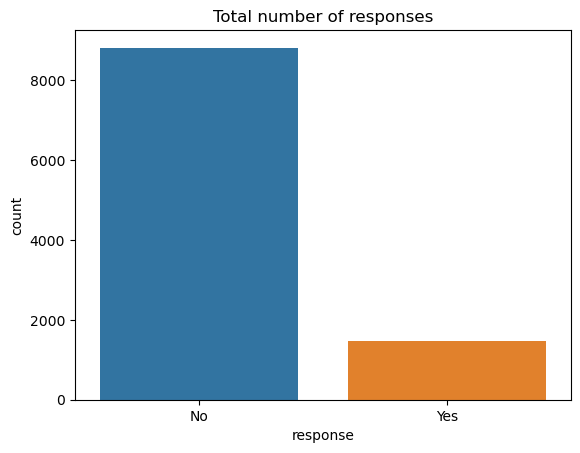

In [36]:
sns.countplot(x='response', data=df)
plt.title('Total number of responses')
plt.show()

4.Show a plot of the response rate by the sales channel.

In [37]:
df['response_numeric'] = df['response'].map({'Yes': 1, 'No': 0})
response_rate = df.groupby('sales_channel')['response_numeric'].mean().reset_index()

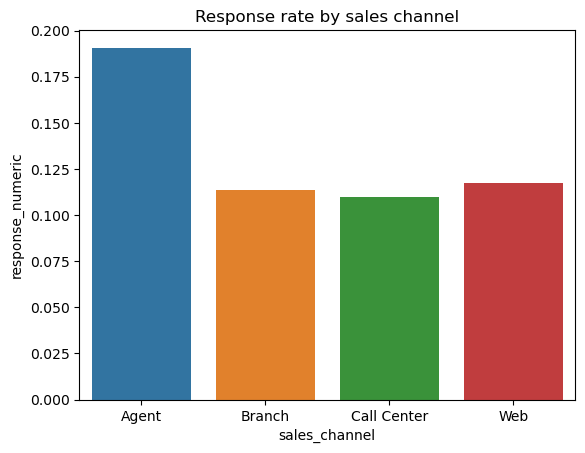

In [38]:
sns.barplot(x='sales_channel', y='response_numeric', data=response_rate)
plt.title('Response rate by sales channel')
plt.show()

5. Show a plot of the response rate by the total claim amount.

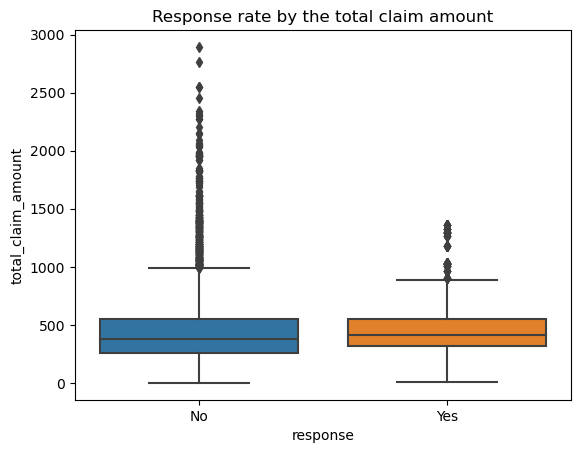

In [44]:
sns.boxplot(x='response', y='total_claim_amount', data=df)
plt.title('Response rate by the total claim amount')
plt.show()

6. Show a plot of the response rate by income.

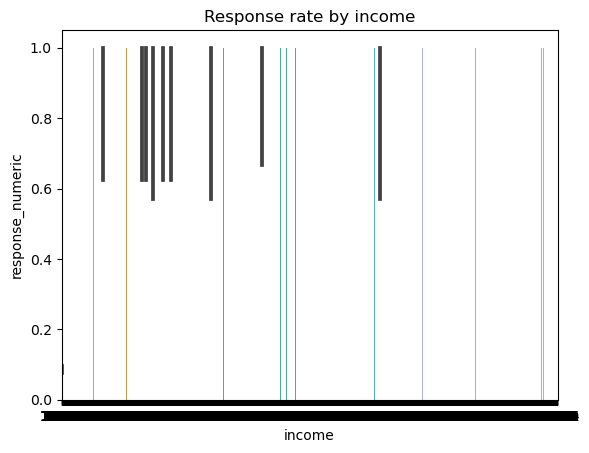

In [42]:
sns.barplot(x='income', y='response_numeric', data=df)
plt.title('Response rate by income')
plt.show()